# Importing and intialising the data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing

#Create your df here:
profiles = pd.read_csv("../input/codecademy-capstone-project/profiles.csv")
profiles.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


# Visualising the data

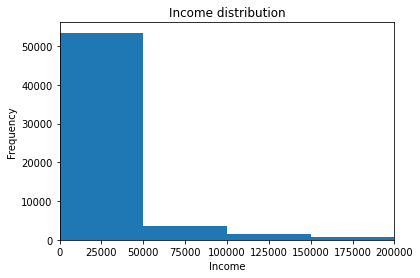

In [2]:
plt.hist(profiles.income, bins = 20)
plt.title("Income distribution")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.xlim(0, 200000)
plt.show()

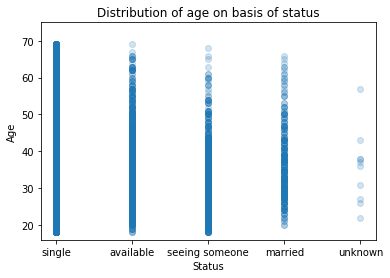

In [3]:
plt.scatter(profiles.status, profiles.age, alpha = 0.2)
plt.title("Distribution of age on basis of status")
plt.xlabel("Status")
plt.ylabel("Age")
plt.ylim(16,75)
plt.show()

# To predict the status

We will determine the ```status``` using the columns ```age```, ```drinks```, ```drugs```, ```smokes```, ```sex``` and ```orientation```. Since all the data is categorical (except ```age```), we will first convert it into numerical data.

In [4]:
# defining the mappings for categorical data
drinks_mapping = {'not at all':0, 'rarely':1, 'socially':2, 'often':3, 'very often':4, 'desperately':5}
drugs_mapping = {'never':0, 'sometimes':1, 'often':2}
smokes_mapping = {'no':0, 'trying to quit':1, 'when drinking':2, 'sometimes':3, 'yes':4}
sex_mapping = {'m':0, 'f':1}
orientation_mapping = {'straight':0, 'gay':1, 'bisexual':2}

# To check the value counts of columns to define the above mentioned mappings
# profiles.column_name.value_counts()

In [5]:
# assigning the categorical columns numerical codes
profiles['drinks_code'] = profiles.drinks.map(drinks_mapping)
profiles['drugs_code'] = profiles.drugs.map(drugs_mapping)
profiles['smokes_code'] = profiles.smokes.map(smokes_mapping)
profiles['sex_code'] = profiles.sex.map(sex_mapping)
profiles['orientation_code'] = profiles.orientation.map(orientation_mapping)

# Normalization of data

Now that every desired columns' data has been converted to numerical data, we first need to normalize it to bring uniformity.

In [6]:
# defining our feature data
feature_data = profiles[['age', 'drinks_code', 'drugs_code', 'smokes_code', 'sex_code', 'orientation_code']]
x = feature_data.values

# scaling our feature data
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)

feature_data = pd.DataFrame(x_scaled, columns = feature_data.columns)

# To check is there are any NaN entries
# feature_data.column_name.isna().value_counts()

# Dealing with missing values

In the column ```drugs_code```, 14080 data entries are missing. If we are to delete these rows, we will be deleting around 23.5% of the data! This will affect the accuracy of our data in the long run. So, instead of deleting the rows, we will be filling the missing values with the median data.

In [7]:
# filling the missing values with the median values of respective columns
for column in feature_data.columns:
    feature_data[column].fillna(feature_data[column].median(), inplace = True)

# Preparing our target labels

We now repeat the same process for ```status``` as we did for the ```feature_data``` (excpet for normalizing).

In [8]:
# repeating
status_mapping = {'married':0, 'seeing someone':1, 'single':2, 'available':3}
profiles['status_code'] = profiles.status.map(status_mapping)

target = profiles['status_code']

target.fillna(target.median(), inplace = True)

# Preparing training and testing datasets

Now that we have our ```feature_data``` and ```target```, we now split it into training and testing data. We will keep ```test_size = 0.25``` and ```random_state = 8```. Our new datasets will be ```train_data```, ```test_data```, ```train_labels``` and ```test_labels```.

In [9]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(feature_data, target, test_size = 0.25, random_state = 8)
train_data.shape, test_data.shape

((44959, 6), (14987, 6))

# Fitting the data using Random Forest

We will use the Random Forest to classify our model. We will use ```n_estimators = 3500```, ```n_jobs = -1``` and ```random_state = 8```.

In [10]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 3500, n_jobs = -1, random_state = 8)
forest.fit(train_data, train_labels)
print(forest.score(test_data, test_labels))

0.9258023620471075


# Finding the legitimacy of our findings

We have got a score of 92.58%, an amazing score! Though the accuracy is high, we need to make sure that the items are also correctly labeled. For this, we will take help of ```crosstab```.

In [11]:
predictions = forest.predict(test_data)
df = pd.DataFrame({'values': test_labels, 'predicted': predictions})
pd.crosstab(df['predicted'], df['values'])

values,0.0,1.0,2.0,3.0
predicted,,,,
0.0,0,0,3,3
1.0,0,5,32,3
2.0,72,496,13855,447
3.0,2,4,50,15


# Need for better classification model

Though we got a very high score, we find that our model was only working perfectly for predicting whether someone is single, and not for any other label. A much better classification would have been made if we had tried to distinguish between whether a person is single or not.

In [12]:
new_status_mapping = {'married':0, 'seeing someone':0, 'single':1, 'available':1}
profiles['single_or_not'] = profiles.status.map(new_status_mapping)

profiles['single_or_not']
new_target = profiles['single_or_not']

new_target.fillna(new_target.median(), inplace = True)

# Preparing new training and testing datasets

Now that we have our ```feature_data``` and ```new_target```, we now split it into training and testing data. We will keep ```test_size = 0.25``` and ```random_state = 8```. Our new datasets will be ```new_train_data```, ```new_test_data```, ```new_train_labels``` and ```new_test_labels```.

In [13]:
new_train_data, new_test_data, new_train_labels, new_test_labels = train_test_split(feature_data, new_target, test_size = 0.25, random_state = 8)
new_train_data.shape, new_test_data.shape

((44959, 6), (14987, 6))

# Fitting the data using Naive Bayes Classifier

We will now test our model using ```MultinomialNB```

In [14]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(new_train_data, new_train_labels)
print(mnb.score(new_test_data, new_test_labels))

0.9613665176486288


# Legitimacy of the new model

We again validate the given score using ```crosstab```.

In [15]:
new_prediction = mnb.predict(new_test_data)
new_df = pd.DataFrame({'values': new_test_labels, 'predictions':new_prediction})
pd.crosstab(new_df['values'], new_df['predictions'])

predictions,1.0
values,
0.0,579
1.0,14408


# Conclusion for classification problem

Thus we understand that our classification helps in identifying whether a person is single or not. What remains is to be seen is that the model can classify with high accuracy whether someone is single/available, but can it also tell whether someone is not?